In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib.inline

['AppleStore.csv', 'appleStore_description.csv']


UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
data_df = pd.read_csv('../input/AppleStore.csv')

In [3]:
data_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


# 1. Price distribution of paid apps


In [4]:
normal_df = data_df[(data_df['price']>0)&(data_df['price']<50)]

In [5]:
print(normal_df.shape)
normal_df.head()

(3134, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1


In [6]:
normal_df['price'].value_counts().to_frame()

,price
0.99,728
2.99,683
1.99,621
4.99,394
3.99,277
6.99,166
9.99,81
5.99,52
7.99,33
14.99,21


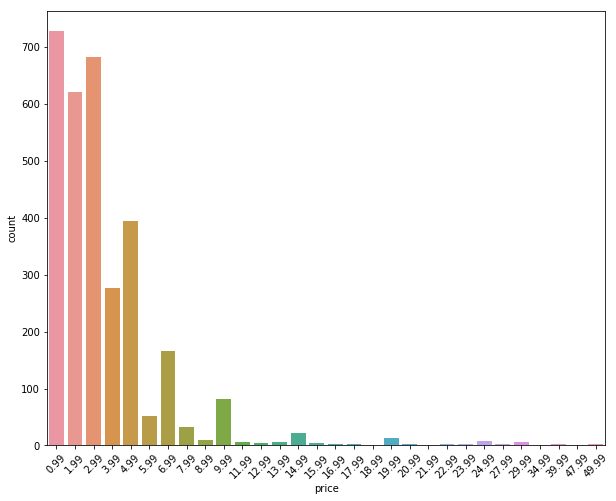

In [7]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(normal_df['price'])

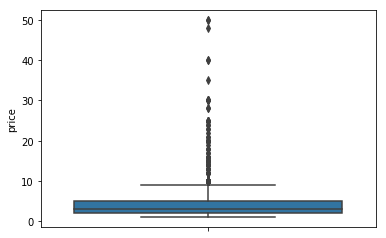

In [8]:
sns.boxplot(y = normal_df['price'])

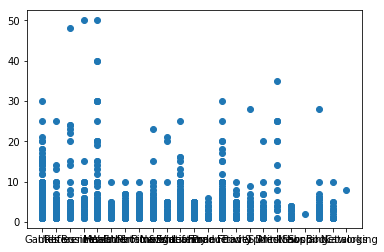

In [9]:
plt.scatter(normal_df['prime_genre'], normal_df['price'])

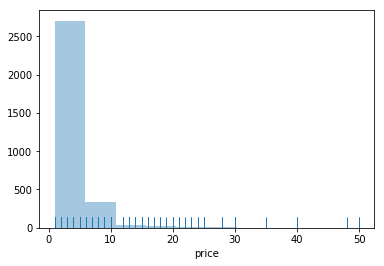

In [10]:
sns.distplot(normal_df['price'], bins=10, kde=False, rug=True)

(array([2.703e+03, 3.410e+02, 3.800e+01, 2.300e+01, 1.500e+01, 8.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00]),
 array([ 0.99,  5.89, 10.79, 15.69, 20.59, 25.49, 30.39, 35.29, 40.19,
        45.09, 49.99]),
 <a list of 10 Patch objects>)

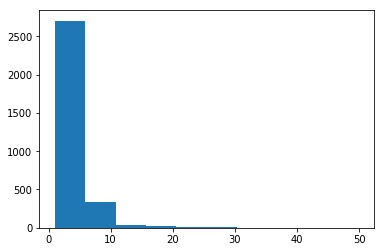

In [11]:
plt.hist(normal_df['price'], bins=10)

In [12]:
normal_df['price'].quantile([0,1/4,1/2,3/4,1]).to_frame()

,price
0.00,0.99
0.25,1.99
0.50,2.99
0.75,4.99
1.00,49.99


# 2. Category VS Price


In [13]:
data_df['prime_genre'].value_counts().to_frame()

,prime_genre
Games,3862
Entertainment,535
Education,453
Photo & Video,349
Utilities,248
Health & Fitness,180
Productivity,178
Social Networking,167
Lifestyle,144
Music,138


In [14]:
N = 10
topn_cate_index = normal_df.prime_genre.value_counts()[:N].index
topn_cate_index
topn_cate_df = normal_df[normal_df['prime_genre'].isin(topn_cate_index)]
print(topn_cate_df.shape)
topn_cate_df.head()

(2830, 17)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1


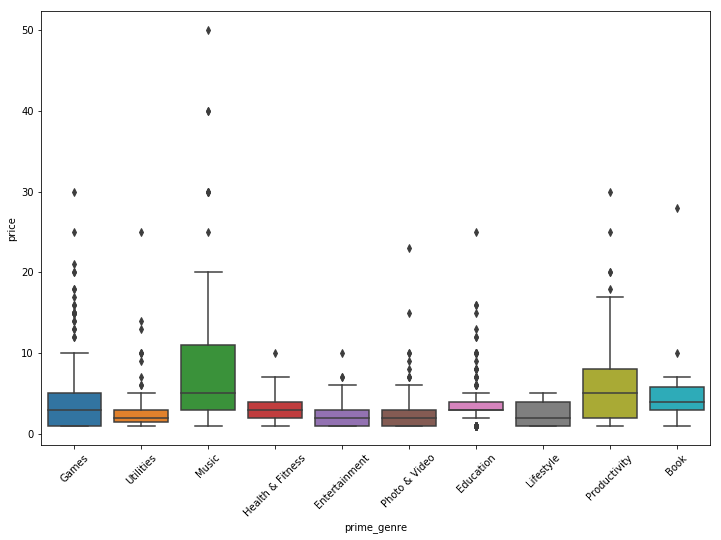

In [15]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
sns.boxplot(topn_cate_df['prime_genre'], topn_cate_df['price'])

# 3. Free VS Paid Apps Quantity

In [16]:
data_df_new = data_df.copy()
data_df_new.shape

(7197, 17)

change cate name to 'others' which is not in topn cates

top10 + others = categories

In [17]:
other_cate_index = data_df_new[~data_df_new['prime_genre'].isin(topn_cate_index)].index
other_cate_index

Int64Index([   2,    3,    4,    6,   13,   15,   16,   17,   20,   22,
            ...
            7105, 7109, 7118, 7123, 7130, 7143, 7156, 7158, 7170, 7179],
           dtype='int64', length=998)

In [18]:
data_df_new.loc[ other_cate_index, 'prime_genre' ] = 'others'

In [19]:
data_df_new['type'] = np.where(data_df_new['price']==0, 'free', 'paid')

In [20]:
print(data_df_new.shape)
data_df_new.head()

(7197, 18)


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,type
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,paid
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,free
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,others,37,5,3,1,free
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,others,37,5,9,1,free
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,others,37,5,45,1,free


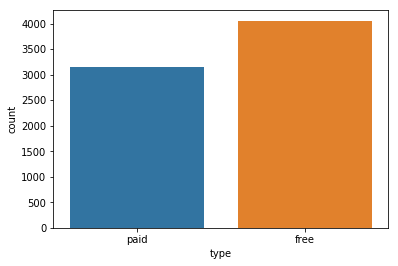

In [21]:
sns.countplot(data_df_new['type'])

pivot

In [22]:
free_paid_count = data_df_new.pivot_table(index=['prime_genre'], columns=['type'], values=['id'], aggfunc='count')
free_paid_count

id      
type              free  paid
prime_genre                 
Book                66    46
Education          132   321
Entertainment      334   201
Games             2257  1605
Health & Fitness    76   104
Lifestyle           94    50
Music               67    71
Photo & Video      167   182
Productivity        62   116
Utilities          109   139
others             692   306

In [23]:
free_paid_count.columns = free_paid_count.columns.droplevel()
free_paid_count

type,free,paid
prime_genre,,
Book,66,46
Education,132,321
Entertainment,334,201
Games,2257,1605
Health & Fitness,76,104
Lifestyle,94,50
Music,67,71
Photo & Video,167,182
Productivity,62,116


In [24]:
groupby_df = data_df_new.groupby(['prime_genre', 'type']).size().to_frame()
groupby_df.columns = ['count']
groupby_df

count
prime_genre      type       
Book             free     66
                 paid     46
Education        free    132
                 paid    321
Entertainment    free    334
                 paid    201
Games            free   2257
                 paid   1605
Health & Fitness free     76
                 paid    104
Lifestyle        free     94
                 paid     50
Music            free     67
                 paid     71
Photo & Video    free    167
                 paid    182
Productivity     free     62
                 paid    116
Utilities        free    109
                 paid    139
others           free    692
                 paid    306

In [25]:
pivot2 = groupby_df.pivot_table(index=['prime_genre'], columns=['type'], values=['count'])
pivot2

count      
type              free  paid
prime_genre                 
Book                66    46
Education          132   321
Entertainment      334   201
Games             2257  1605
Health & Fitness    76   104
Lifestyle           94    50
Music               67    71
Photo & Video      167   182
Productivity        62   116
Utilities          109   139
others             692   306

In [26]:
free_paid_count['free_perc'] = free_paid_count['free'] / (free_paid_count['free']+free_paid_count['paid'])
free_paid_count['paid_perc'] = free_paid_count['paid'] / (free_paid_count['free']+free_paid_count['paid'])

In [27]:
free_paid_count

type,free,paid,free_perc,paid_perc
prime_genre,,,,
Book,66,46,0.589286,0.410714
Education,132,321,0.291391,0.708609
Entertainment,334,201,0.624299,0.375701
Games,2257,1605,0.584412,0.415588
Health & Fitness,76,104,0.422222,0.577778
Lifestyle,94,50,0.652778,0.347222
Music,67,71,0.485507,0.514493
Photo & Video,167,182,0.478510,0.521490
Productivity,62,116,0.348315,0.651685


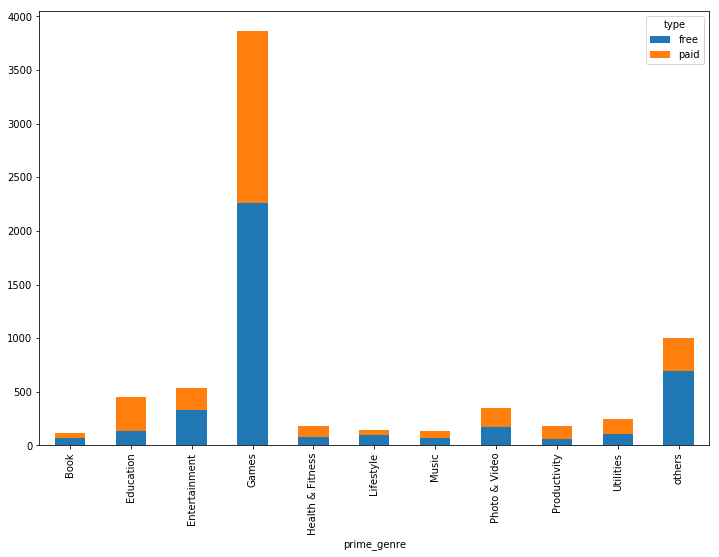

In [28]:
free_paid_count[['free','paid']].plot(kind='bar',stacked=True, figsize=(12,8))

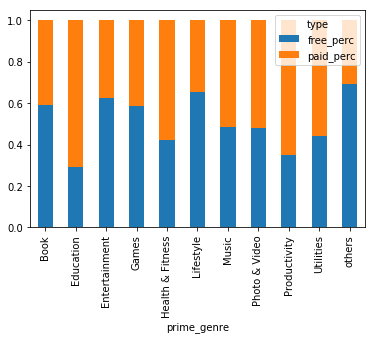

In [29]:
free_paid_count[['free_perc','paid_perc']].plot(kind='bar', stacked=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7821a6f780>,
      dtype=object)

<Figure size 1152x648 with 0 Axes>

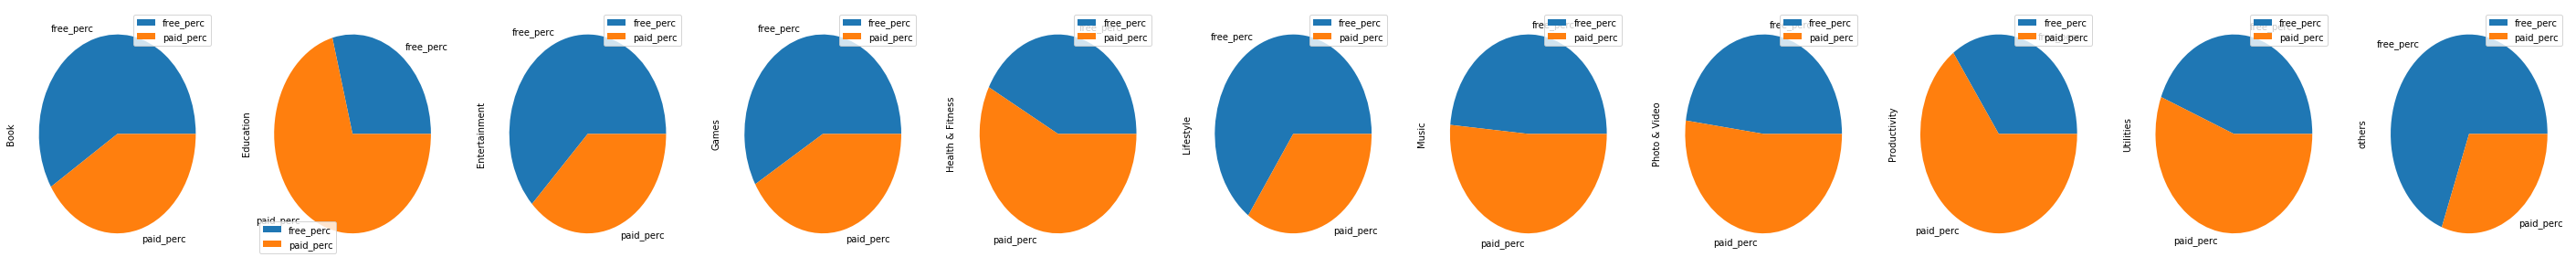

In [30]:
plt.figure(figsize=(16,9))
free_paid_count[['free_perc','paid_perc']].T.plot.pie(subplots=True,figsize=(50,5))

# 4. Price VS Rating

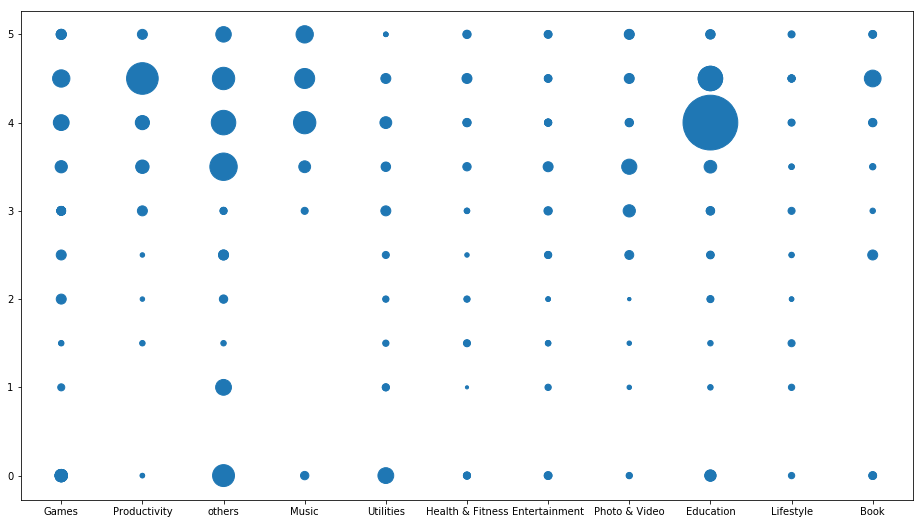

In [31]:
plt.figure(figsize=(16,9))
plt.scatter(x=data_df_new['prime_genre'], y=data_df_new['user_rating'], s=10*data_df_new['price'])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


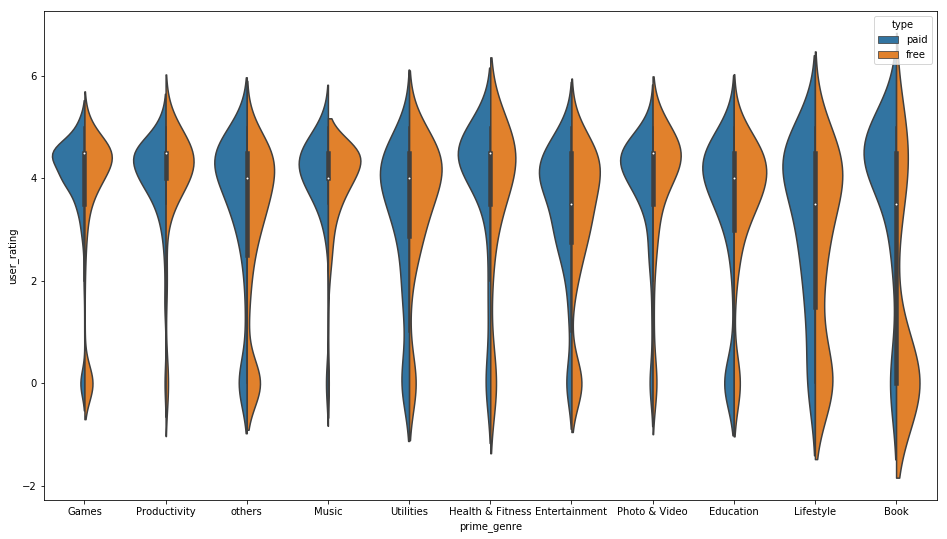

In [32]:
plt.figure(figsize=(16,9))
sns.violinplot(data=data_df_new, x='prime_genre', y='user_rating', hue='type', split=True)

# 5. Price VS Size

In [33]:
normal_df['size_mb'] = normal_df['size_bytes'] / 1000000

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
normal_df.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,size_mb
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,100.788224
5,6,283619399,Shanghai Mahjong,10485713,USD,0.99,8253,5516,4.0,4.0,1.8,4+,Games,47,5,1,1,10.485713
8,9,284666222,PCalc - The Best Calculator,49250304,USD,9.99,1117,4,4.5,5.0,3.6.6,4+,Utilities,37,5,1,1,49.250304
9,10,284736660,Ms. PAC-MAN,70023168,USD,3.99,7885,40,4.0,4.0,4.0.4,4+,Games,38,0,10,1,70.023168
10,11,284791396,Solitaire by MobilityWare,49618944,USD,4.99,76720,4017,4.5,4.5,4.10.1,4+,Games,38,4,11,1,49.618944


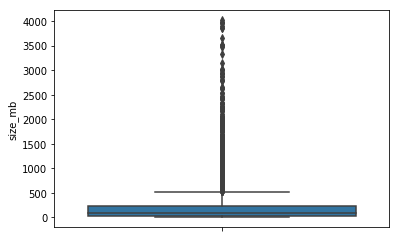

In [35]:
sns.boxplot(y=normal_df['size_mb'])

In [36]:
normal_df['size_mb'].describe()

count    3134.000000
mean      265.131131
std       481.628894
min         0.589824
25%        36.796928
50%        92.165632
75%       233.317376
max      4025.969664
Name: size_mb, dtype: float64

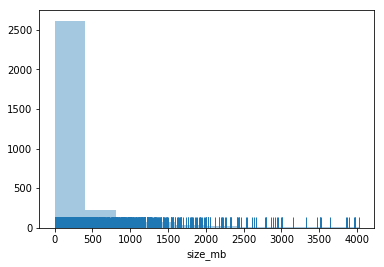

In [37]:
sns.distplot(normal_df['size_mb'], bins=10, kde=False, rug=True)

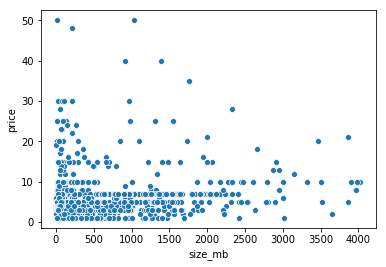

In [38]:
sns.scatterplot(x=normal_df['size_mb'], y=normal_df['price'])

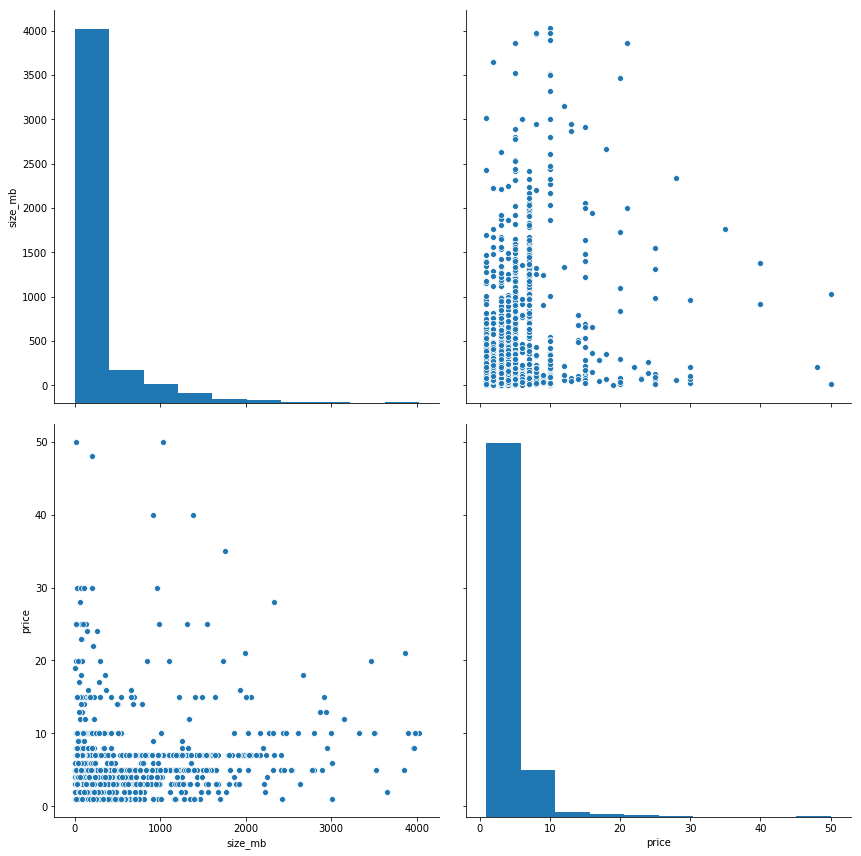

In [39]:
sns.pairplot(normal_df[['size_mb','price']], height=6)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f782113db00>,
      dtype=object)

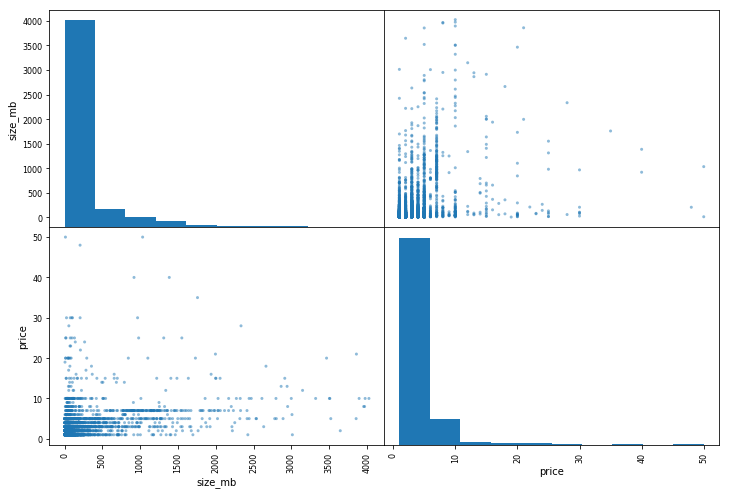

In [40]:
pd.scatter_matrix(normal_df[['size_mb','price']],figsize=(12,8),range_padding=0.1)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


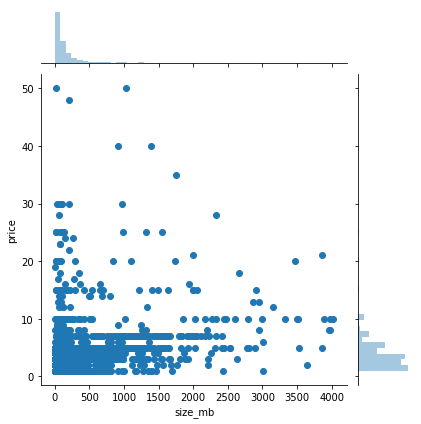

In [41]:
sns.jointplot(x=normal_df['size_mb'], y=normal_df['price'])

In [42]:
corr = normal_df[['size_mb','price']].corr()
corr

,size_mb,price
size_mb,1.000000,0.306361
price,0.306361,1.000000


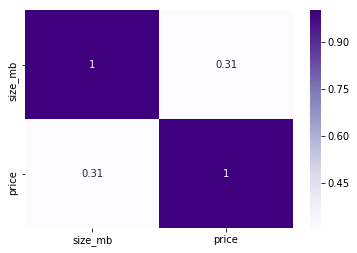

In [43]:
sns.heatmap(corr, annot=True, cmap='Purples')